<a href="https://colab.research.google.com/github/pcabr24/AluraStoreLatam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [167]:
import requests
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# 1. Cargar los datos directamente desde la API utilizando Python.
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [168]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [169]:
# Asumimos que el DataFrame se llama 'df'

print("--- Eliminando Caracteres Molestos de las Columnas de Texto ---")

# 1. Seleccionar todas las columnas que contienen texto (object)
columnas_texto = df.select_dtypes(include='object').columns

# 2. Definir los caracteres que queremos eliminar o reemplazar
caracteres_a_limpiar = ['{', '}', '[', ']', "'", '"']

# 3. Recorrer cada columna de texto y limpiar
for col in columnas_texto:
    # Convertir la columna a tipo string (texto) para asegurar
    df[col] = df[col].astype(str)

    # Reemplazar cada carácter no deseado por un espacio vacío
    for char in caracteres_a_limpiar:
        df[col] = df[col].str.replace(char, '', regex=False)

    # Eliminar espacios extra que pudieran quedar al inicio o final (Trim)
    df[col] = df[col].str.strip()

--- Eliminando Caracteres Molestos de las Columnas de Texto ---


In [170]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"gender: Female, SeniorCitizen: 0, Partner: Yes...","PhoneService: Yes, MultipleLines: No","InternetService: DSL, OnlineSecurity: No, Onli...","Contract: One year, PaperlessBilling: Yes, Pay..."
1,0003-MKNFE,No,"gender: Male, SeniorCitizen: 0, Partner: No, D...","PhoneService: Yes, MultipleLines: Yes","InternetService: DSL, OnlineSecurity: No, Onli...","Contract: Month-to-month, PaperlessBilling: No..."
2,0004-TLHLJ,Yes,"gender: Male, SeniorCitizen: 0, Partner: No, D...","PhoneService: Yes, MultipleLines: No","InternetService: Fiber optic, OnlineSecurity: ...","Contract: Month-to-month, PaperlessBilling: Ye..."
3,0011-IGKFF,Yes,"gender: Male, SeniorCitizen: 1, Partner: Yes, ...","PhoneService: Yes, MultipleLines: No","InternetService: Fiber optic, OnlineSecurity: ...","Contract: Month-to-month, PaperlessBilling: Ye..."
4,0013-EXCHZ,Yes,"gender: Female, SeniorCitizen: 1, Partner: Yes...","PhoneService: Yes, MultipleLines: No","InternetService: Fiber optic, OnlineSecurity: ...","Contract: Month-to-month, PaperlessBilling: Ye..."


In [171]:
import pandas as pd
import requests
from pandas import json_normalize

# --- PASO 1: Cargar y Aplanar ---
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
datos = requests.get(url).json()
df = json_normalize(datos, sep='_')

# --- PASO 2: Definir el nuevo mapa con ---
mapa_renombrar = {
    'customer_customerID': 'customerID',
    'Churn': 'Churn',
    'customer_gender': 'gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'Charges.Monthly',
    'account_Charges_Total': 'Charges.Total'
}

# --- PASO 3: Renombrar y Filtrar ---
df = df.rename(columns=mapa_renombrar)
columnas_finales = list(mapa_renombrar.values())
df = df[columnas_finales]

print("\n--- ¡Verificación Rápida de Columnas! ---")
print(df.columns.tolist())


--- ¡Verificación Rápida de Columnas! ---
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [172]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

## **Explorar las columnas del dataset y verificar sus tipos de datos.**

In [173]:
# 1. Explorar con df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [174]:
#Exportacion a excel para visualizacion de datos
#df.to_excel('/content/TelecomX_Data.xlsx', index=False)

## **Consultar el diccionario para comprender mejor el significado de las variables.**

### 📊 Diccionario de Variables – Dataset Churn Telecom

| Variable | Descripción |
|--------|-------------|
| `customerID` | Número de identificación único de cada cliente |
| `Churn` | Indica si el cliente dejó o no la empresa |
| `gender` | Género del cliente (masculino o femenino) |
| `SeniorCitizen` | Indica si el cliente tiene una edad igual o mayor a 65 años |
| `Partner` | Indica si el cliente tiene o no una pareja |
| `Dependents` | Indica si el cliente tiene o no dependientes |
| `tenure` | Cantidad de meses que el cliente ha permanecido con la empresa |
| `PhoneService` | Suscripción al servicio telefónico |
| `MultipleLines` | Suscripción a más de una línea telefónica |
| `InternetService` | Suscripción a un proveedor de internet |
| `OnlineSecurity` | Suscripción adicional de seguridad en línea |
| `OnlineBackup` | Suscripción adicional de respaldo en línea |
| `DeviceProtection` | Suscripción adicional de protección del dispositivo |
| `TechSupport` | Suscripción adicional de soporte técnico (menor tiempo de espera) |
| `StreamingTV` | Suscripción a televisión por cable |
| `StreamingMovies` | Suscripción a streaming de películas |
| `Contract` | Tipo de contrato del cliente |
| `PaperlessBilling` | Indica si el cliente prefiere recibir la factura en línea |
| `PaymentMethod` | Forma de pago del cliente |
| `Charges.Monthly` | Total de cargos mensuales por los servicios contratados |
| `Charges.Total` | Total acumulado gastado por el cliente |


In [175]:
# 2. Explorar con dtypes
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


## **Comprobación de incoherencias en los datos**

In [176]:
# 1. Reemplazar cualquier espacio vacío (' ') con un valor Nulo (NaN)
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)

# 2. Convertir la columna a número (float).
# Si hay algún texto que no se pueda convertir, 'errors='coerce' lo convierte a Nulo.
df['Charges.Total'] = pd.to_numeric(
    df['Charges.Total'],
    errors='coerce'
)
print("✅ Columna 'Charges.Total' convertida a números decimales.")
# Verificamos el nuevo tipo de dato y si aparecieron nulos
df.info()

✅ Columna 'Charges.Total' convertida a números decimales.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null

## **Identificación de Variables Clave para Evasión**

| Columna | Grupo | ¿Por Qué Es Importante? |
|--------|-------|-------------------------|
| Churn | Objetivo | Es la variable que queremos predecir (Sí/No). |
| Contract | Contrato | Clientes Mes-a-mes tienen mayor probabilidad de churn. |
| tenure | Uso / Antigüedad | Antigüedad del cliente influye en la permanencia. |
| Charges.Monthly | Cargos | Tarifas altas aumentan la sensibilidad al churn. |
| Charges.Total | Cargos | Relacionado directamente con la antigüedad. |
| InternetService | Servicio | Fiber optic suele tener mayor churn si hay mala calidad. |
| OnlineSecurity / TechSupport | Servicio | Servicios adicionales aumentan la fidelidad. |

In [177]:
print("--- Revisando Contratos (Variable Clave) ---")

# Contamos cuántos clientes hay en cada tipo de contrato
print(df['Contract'].value_counts())

--- Revisando Contratos (Variable Clave) ---
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


In [178]:
# Rellenando columnas vacias charges.total con 0
print("--- 1. Rellenando Nulos en Charges.Total ---")
# Usamos fillna(0) para cambiar todos los valores Nulos (NaN) por un cero
df['Charges.Total'] = df['Charges.Total'].fillna(0)
print("✅ Valores Nulos rellenados con 0.")
print("\n--- ¡Verificación Final! ---")
# Verificamos que ya no queden nulos en la columna.
nulos_total = df['Charges.Total'].isnull().sum()
print(f"Total de valores faltantes total: {nulos_total}")

--- 1. Rellenando Nulos en Charges.Total ---
✅ Valores Nulos rellenados con 0.

--- ¡Verificación Final! ---
Total de valores faltantes total: 0


In [179]:
df.to_excel('/content/TelecomX_Data.xlsx', index=False)

## **Manejo de inconsistencias**

In [180]:
print("--- 🔎 Verificación de Inconsistencias Categóricas (Texto) ---")
# Usamos .unique() para encontrar todas las formas únicas en que se escriben las categorías.
print(f"Valores únicos en 'gender': {df['gender'].unique()}")
print(f"Valores únicos en 'Churn': {df['Churn'].unique()}") # ¡Aquí se encontró el valor 'nan'!

# --- 🛠️ Arreglo de Inconsistencias Numéricas ---

# 2. Corregir Inconsistencia N° 1: Tipo de Dato Incorrecto y Valores con Espacios
# Esto cambia la columna 'Charges.Total' de texto a número (float).
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# 3. Corregir Inconsistencia N° 2: Valores Faltantes (NaN)
# Remplazamos los NaN (que sabemos son de clientes con 0 meses) por 0.0.
df['Charges.Total'] = df['Charges.Total'].fillna(0.0)

print("\n--- ✅ Resultados de la Corrección de Cargos ---")
print(f"Tipo de dato de 'Charges.Total' (Debe ser float): {df['Charges.Total'].dtype}")
print(f"Valores faltantes restantes en 'Charges.Total': {df['Charges.Total'].isna().sum()}")

# --- 📅 Ejemplo de Herramienta Adicional: dt.normalize() ---

print("\n--- 💡 Ejemplo de Uso de dt.normalize() para Fechas ---")
# Esto NO afecta a tu archivo, es solo para demostrar la función.
data_tiempo = pd.DataFrame({
    'Fecha_Hora_Conexion': [
        '2025-12-23 15:30:00',
        '2025-12-23 09:15:00',
        '2025-12-24 00:00:01'
    ]
})

data_tiempo['Fecha_Hora_Conexion'] = pd.to_datetime(data_tiempo['Fecha_Hora_Conexion'])

# Aplicamos .dt.normalize() para dejar solo la fecha
data_tiempo['Solo_Fecha'] = data_tiempo['Fecha_Hora_Conexion'].dt.normalize()

print("Original (Fecha y Hora) y Normalizada (Solo Fecha):")
print(data_tiempo)

--- 🔎 Verificación de Inconsistencias Categóricas (Texto) ---
Valores únicos en 'gender': ['Female' 'Male']
Valores únicos en 'Churn': ['No' 'Yes' '']

--- ✅ Resultados de la Corrección de Cargos ---
Tipo de dato de 'Charges.Total' (Debe ser float): float64
Valores faltantes restantes en 'Charges.Total': 0

--- 💡 Ejemplo de Uso de dt.normalize() para Fechas ---
Original (Fecha y Hora) y Normalizada (Solo Fecha):
  Fecha_Hora_Conexion Solo_Fecha
0 2025-12-23 15:30:00 2025-12-23
1 2025-12-23 09:15:00 2025-12-23
2 2025-12-24 00:00:01 2025-12-24


## **Columna de cuentas diarias**

In [181]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

# --- Comprobación y Muestra de Resultados ---

# 3. Mostrar las primeras filas con la nueva columna para verificar
print("--- Primeras 5 Filas con la Nueva Columna 'Cuentas_Diarias' ---")
print(df[['Charges.Monthly', 'Cuentas_Diarias']].head())

# 4. Mostrar el tipo de dato de la nueva columna (debe ser numérico)
print(f"\nTipo de dato de 'Cuentas_Diarias': {df['Cuentas_Diarias'].dtype}")

--- Primeras 5 Filas con la Nueva Columna 'Cuentas_Diarias' ---
   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667

Tipo de dato de 'Cuentas_Diarias': float64


## **Estandarización y transformación de datos**

In [182]:
# 2. Definir el diccionario de traducción
diccionario_traduccion = {
    'customerID': 'ID_Cliente',
    'Churn': 'Abandono',
    'gender': 'Genero',
    'SeniorCitizen': 'Tercera_Edad',
    'Partner': 'Socio',
    'Dependents': 'Dependientes',
    'tenure': 'Permanencia_Meses',
    'PhoneService': 'Servicio_Telefono',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Copia_Seguridad_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Factura_Digital',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
}

# 3. Aplicar el renombramiento usando el método .rename()
df = df.rename(columns=diccionario_traduccion)

# --- Comprobación Final ---
print("--- ✅ Nombres de Columnas Traducidos ---")
print(df.columns.tolist())

--- ✅ Nombres de Columnas Traducidos ---
['ID_Cliente', 'Abandono', 'Genero', 'Tercera_Edad', 'Socio', 'Dependientes', 'Permanencia_Meses', 'Servicio_Telefono', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Factura_Digital', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']


In [183]:
df.head()

,ID_Cliente,Abandono,Genero,Tercera_Edad,Socio,Dependientes,Permanencia_Meses,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [184]:
# --- Aplicar la limpieza necesaria antes de rellenar Churn ---
# Debemos asegurarnos de que Charges.Total está limpio, como hicimos antes.
df['Cargos_Totales'] = pd.to_numeric(df['Cargos_Totales'], errors='coerce').fillna(0.0)

# --- El código MÁS SIMPLE para el arreglo final ---

# 2. Rellenamos el valor faltante (nan) en 'Churn' con 'No'
# .fillna('No') dice: "donde haya un hueco, escribe 'No'".
df['Abandono'] = df['Abandono'].fillna('No')

# --- Comprobación Final ---

# 3. Revisamos que el nan haya desaparecido
abandono_valores_final = df['Abandono'].unique()

print("--- ✅ Columna Abandono Limpio ---")
print(f"Valores únicos en 'Abandono' ahora: {abandono_valores_final}")
print(f"Total de valores nulos en toda la planilla: {df.isnull().sum().sum()}")

# Esto cuenta automáticamente cuántas veces aparece cada valor único.
conteo_abandono = df['Abandono'].value_counts(dropna=False)

print("--- 📋 Conteo de Clientes (Yes/No/Faltantes) ---")
print(conteo_abandono)

--- ✅ Columna Abandono Limpio ---
Valores únicos en 'Abandono' ahora: ['No' 'Yes' '']
Total de valores nulos en toda la planilla: 0
--- 📋 Conteo de Clientes (Yes/No/Faltantes) ---
Abandono
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [185]:
columnas_si_no_servicio = []

# Recorremos solo las columnas de texto (object)
for columna in df.select_dtypes(include=['object']).columns:

    # 2. Obtenemos solo las respuestas diferentes (quitando NaN por si acaso)
    valores_unicos = df[columna].dropna().unique()

    # 3. La clave: Verificamos si la columna contiene tanto 'Yes' como 'No'
    # y si tiene 2 O 3 valores únicos (para incluir el 'No service')
    if 'Yes' in valores_unicos and 'No' in valores_unicos and len(valores_unicos) <= 3:
        columnas_si_no_servicio.append(columna)

print("--- 📋 Las 12 Columnas que Contienen 'Yes' / 'No' / 'No service' ---")
print(columnas_si_no_servicio)

--- 📋 Las 12 Columnas que Contienen 'Yes' / 'No' / 'No service' ---
['Abandono', 'Socio', 'Dependientes', 'Servicio_Telefono', 'Multiples_Lineas', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Digital']


In [186]:
# --- Preparación (Necesaria para que el código principal funcione) ---
# Primero, definimos las 12 columnas que vamos a cambiar (del paso anterior).
columnas_a_codificar = [
    'Abandono', 'Socio', 'Dependientes', 'Servicio_Telefono', 'Multiples_Lineas',
    'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Digital'
]

# También tenemos que asegurarnos de que Charges.Total y Churn estén limpios.
df['Cargos_Totales'] = pd.to_numeric(df['Cargos_Totales'], errors='coerce').fillna(0.0)
df['Abandono'] = df['Abandono'].fillna('No') # Rellenamos el único NaN en Churn

# --- El código MÁS SIMPLE para el reemplazo ---

# 2. Definimos el mapa de reemplazo
mapa_reemplazo = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
}

# 3. Aplicamos el reemplazo a todas las columnas a la vez
# .replace() hace el cambio, y inplace=True lo guarda en el DataFrame.
df[columnas_a_codificar] = df[columnas_a_codificar].replace(mapa_reemplazo)

# --- Comprobación Final ---

print("--- ✅ Columnas Codificadas Numéricamente (0 y 1) ---")
# Mostramos una pequeña muestra para ver el cambio
print(df[columnas_a_codificar].head())
print(f"\nTipo de dato de 'Abandono' ahora: {df['Abandono'].dtype}")

--- ✅ Columnas Codificadas Numéricamente (0 y 1) ---
  Abandono  Socio  Dependientes  Servicio_Telefono  Multiples_Lineas  \
0        0      1             1                  1                 0   
1        0      0             0                  1                 1   
2        1      0             0                  1                 0   
3        1      1             0                  1                 0   
4        1      1             0                  1                 0   

   Seguridad_Online  Copia_Seguridad_Online  Proteccion_Dispositivo  \
0                 0                       1                       0   
1                 0                       0                       0   
2                 0                       0                       1   
3                 0                       1                       1   
4                 0                       0                       0   

   Soporte_Tecnico  Streaming_TV  Streaming_Peliculas  Factura_Digital  
0             

/tmp/ipython-input-2701734838.py:25: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [187]:
df.head(5)

,ID_Cliente,Abandono,Genero,Tercera_Edad,Socio,Dependientes,Permanencia_Meses,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

## **Análisis Descriptivo**

In [188]:
df.describe()

,Tercera_Edad,Socio,Dependientes,Permanencia_Meses,Servicio_Telefono,Multiples_Lineas,Seguridad_Online,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Factura_Digital,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


## **Distribución de evasión**

In [189]:
# --- Preparación y Codificación de la Columna Churn ---

# Reemplazamos 'Yes' por 1 y 'No' por 0 en la columna original 'Churn'.
df['Abandono'] = df['Abandono'].replace({'Yes': 1, 'No': 0})

# **¡Paso clave!** Creamos una nueva columna (Churn_Etiqueta) donde reemplazamos el NaN (null)
# por la etiqueta de texto "Sin Datos". Esto es lo que se graficará.
df['Abandono_Etiqueta'] = df['Abandono'].fillna('Sin Datos')

# 3. Contar la distribución (ahora tendrá 0, 1 y 'Sin Datos')
conteo_churn = df['Abandono_Etiqueta'].value_counts().reset_index()
conteo_churn.columns = ['Codigo', 'Clientes']

# 4. Mapear (Traducir) los códigos 0 y 1 a etiquetas claras
conteo_churn['Abandono'] = conteo_churn['Codigo'].map({
    0: 'No abandono',
    1: 'Sí abandono',
    '': 'Sin Datos' # Mantiene la etiqueta "Sin Datos"
})

# --- Creación del Gráfico Plotly ---

# 5. Crear el gráfico de pastel interactivo
fig = px.pie(
    conteo_churn,
    values='Clientes',
    names='Abandono', # Usa las etiquetas claras
    title='Distribución de Clientes por Abandono (Incluyendo Sin Datos)',
    # Asignamos colores para que "Sin Datos" sea gris y se vea diferente
    color_discrete_map={
        'No abandono': 'skyblue',
        'Sí abandono': 'salmon',
        'Sin Datos': 'grey'
    }
)

fig.show() # Muestra el gráfico interactivo

## **Recuento de evasión por variables categóricas**

In [190]:
# Esto es necesario para hacer la suma y el promedio.
df['Abandono_Cod'] = df['Abandono'].replace({'Yes': 1, 'No': 0}).fillna(0)

# 3. Asegurar que la columna a analizar sea texto y limpiar NaN
df['Dependientes'] = df['Dependientes'].astype(str).fillna('Sin Dato')

# --- El código MÁS SIMPLE para el conteo de grupos ---

# 4. Agrupar por 'Dependents' y contar cuántos 'Sí Abandono' (1) y 'No Abandono' (0) hay
conteo_abandono = df.groupby('Dependientes')['Abandono_Cod'].value_counts()

print("--- 📋 Conteo de Abandono por Dependientes ---")
print(conteo_abandono)

--- 📋 Conteo de Abandono por Dependientes ---
Dependientes  Abandono_Cod
0             0               3390
              1               1543
                               153
1             0               1784
              1                326
                                71
Name: count, dtype: int64


In [191]:
#df.to_excel('/content/TelecomX_Data_español.xlsx', index=False)

In [192]:
# --- Preparación 1: Limpieza y Codificación ROBUSTA (Solución del error) ---

# Limpieza ROBUSTA de Permanencia_Meses (CRUCIAL)
# Convertimos cualquier texto o valor nulo a 0 para asegurar que sea numérico para pd.cut
df['Permanencia_Meses'] = pd.to_numeric(df['Permanencia_Meses'],errors='coerce').fillna(0)

# Limpieza ROBUSTA de Abandono (para la suma)
# Convertimos cualquier texto que no sea 0/1 a NaN, luego a 0, y aseguramos el tipo INT.
df['Abandono_Cod'] = pd.to_numeric(df['Abandono'],errors='coerce').fillna(0).astype(int)

# --- CRUCE CLAVE: Creación de Grupos de Antigüedad (Binning) ---
# Definir los límites para los grupos de permanencia (en meses)
bins = [0, 1, 12, 24, np.inf]
nombres_grupos = ['0-1 mes (Nuevos)', '2-12 meses (Primer Año)','13-24 meses (Segundo Año)', 'Más de 2 años (Antiguos)']

# Crear la nueva columna categórica 'Grupo_Permanencia'
df['Grupo_Permanencia'] = pd.cut(df['Permanencia_Meses'],bins=bins,labels=nombres_grupos,right=False)

# --- El código de Agregación Final ---
columna = 'Grupo_Permanencia'
print(f"\n--- 📋 Análisis de Abandono por {columna.upper()} ---")

# 6. Agrupar y calcular la Tasa de Abandono (Sintaxis compatible)
analisis = df.groupby(columna)['Abandono_Cod'].agg(['count', 'sum'])

# 7. Renombrar las columnas
analisis.columns = ['Total_Clientes', 'Clientes_Abandonaron']

# 8. Crear la Tasa de Abandono (%)
analisis['Tasa_Abandono_%'] = (analisis['Clientes_Abandonaron'] / analisis['Total_Clientes']) * 100

# 9. Mostrar la tabla de resultados
print(analisis.round(2))


--- 📋 Análisis de Abandono por GRUPO_PERMANENCIA ---
                           Total_Clientes  Clientes_Abandonaron  \
Grupo_Permanencia                                                 
0-1 mes (Nuevos)                       11                     0   
2-12 meses (Primer Año)              2135                   999   
13-24 meses (Segundo Año)            1069                   309   
Más de 2 años (Antiguos)             4052                   561   

                           Tasa_Abandono_%  
Grupo_Permanencia                           
0-1 mes (Nuevos)                      0.00  
2-12 meses (Primer Año)              46.79  
13-24 meses (Segundo Año)            28.91  
Más de 2 años (Antiguos)             13.85  


/tmp/ipython-input-1497563864.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [193]:
df

,ID_Cliente,Abandono,Genero,Tercera_Edad,Socio,Dependientes,Permanencia_Meses,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,...,Streaming_Peliculas,Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Abandono_Etiqueta,Abandono_Cod,Grupo_Permanencia
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,One year,1,Mailed check,65.60,593.30,2.186667,0,0,2-12 meses (Primer Año)
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667,0,0,2-12 meses (Primer Año)
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333,1,1,2-12 meses (Primer Año)
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667,1,1,13-24 meses (Segundo Año)
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667,1,1,2-12 meses (Primer Año)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,One year,0,Mailed check,55.15,742.90,1.838333,0,0,13-24 meses (Segundo Año)
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667,1,1,13-24 meses (Segundo Año)
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667,0,0,2-12 meses (Primer Año)
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,Two year,0,Mailed check,67.85,4627.65,2.261667,0,0,Más de 2 años (Antiguos)


## **Conteo de evasión por variables numéricas**

In [194]:
df['Cargos_Totales'] = pd.to_numeric(df['Cargos_Totales'], errors='coerce').fillna(0)
df['Abandono_Cod'] = pd.to_numeric(df['Abandono'], errors='coerce').fillna(0).astype(int)

# --- ¡AJUSTE CLAVE 1! Creación de la columna de etiquetas de texto ---
df['Estado_Abandono'] = df['Abandono_Cod'].replace({0: 'Se Quedaron', 1: 'Se Fueron'})

# Agrupar por Contrato Y por el NUEVO estado de Abandono (Etiquetas de texto)
print("--- Gasto Total Promedio por Contrato y Estado de Abandono ---")

# Usamos la nueva columna 'Estado_Abandono' en el groupby
gasto_promedio_por_contrato = df.groupby(['Contrato', 'Estado_Abandono']).agg(Cargos_Totales_Promedio=('Cargos_Totales', 'mean')).round(2)
tabla_final = gasto_promedio_por_contrato.reset_index()

# Mostrar la tabla de resultados
print(tabla_final)

--- Gasto Total Promedio por Contrato y Estado de Abandono ---
         Contrato Estado_Abandono  Cargos_Totales_Promedio
0  Month-to-month       Se Fueron                  1164.46
1  Month-to-month     Se Quedaron                  1509.19
2        One year       Se Fueron                  4066.21
3        One year     Se Quedaron                  2926.02
4        Two year       Se Fueron                  5432.36
5        Two year     Se Quedaron                  3645.92


In [195]:
# 1. Detectar y crear un nuevo DataFrame con los clientes que CANCELARON
print("--- 🔎 Clientes que SÍ Cancelaron (Se Fueron) ---")
clientes_cancelaron = df[df['Estado_Abandono'] == 'Se Fueron']
# Muestra solo el inicio (las primeras 5 filas) para no sobrecargar
print(clientes_cancelaron.head())

# 2. Detectar y crear un nuevo DataFrame con los clientes que NO Cancelaron
print("\n--- 🔎 Clientes que NO Cancelaron (Se Quedaron) ---")
clientes_no_cancelaron = df[df['Estado_Abandono'] == 'Se Quedaron']

# Muestra solo el inicio (las primeras 5 filas)
print(clientes_no_cancelaron.head())

--- 🔎 Clientes que SÍ Cancelaron (Se Fueron) ---
    ID_Cliente Abandono  Genero  Tercera_Edad  Socio Dependientes  \
2   0004-TLHLJ        1    Male             0      0            0   
3   0011-IGKFF        1    Male             1      1            0   
4   0013-EXCHZ        1  Female             1      1            0   
18  0022-TCJCI        1    Male             1      0            0   
19  0023-HGHWL        1    Male             1      0            0   

    Permanencia_Meses  Servicio_Telefono  Multiples_Lineas Servicio_Internet  \
2                   4                  1                 0       Fiber optic   
3                  13                  1                 0       Fiber optic   
4                   3                  1                 0       Fiber optic   
18                 45                  1                 0               DSL   
19                  1                  0                 0               DSL   

    ...        Contrato  Factura_Digital              M

In [196]:
df

,ID_Cliente,Abandono,Genero,Tercera_Edad,Socio,Dependientes,Permanencia_Meses,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,...,Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Abandono_Etiqueta,Abandono_Cod,Grupo_Permanencia,Estado_Abandono
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,One year,1,Mailed check,65.60,593.30,2.186667,0,0,2-12 meses (Primer Año),Se Quedaron
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,Month-to-month,0,Mailed check,59.90,542.40,1.996667,0,0,2-12 meses (Primer Año),Se Quedaron
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,Month-to-month,1,Electronic check,73.90,280.85,2.463333,1,1,2-12 meses (Primer Año),Se Fueron
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,Month-to-month,1,Electronic check,98.00,1237.85,3.266667,1,1,13-24 meses (Segundo Año),Se Fueron
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,Month-to-month,1,Mailed check,83.90,267.40,2.796667,1,1,2-12 meses (Primer Año),Se Fueron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,One year,0,Mailed check,55.15,742.90,1.838333,0,0,13-24 meses (Segundo Año),Se Quedaron
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,Month-to-month,1,Electronic check,85.10,1873.70,2.836667,1,1,13-24 meses (Segundo Año),Se Fueron
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,Month-to-month,1,Mailed check,50.30,92.75,1.676667,0,0,2-12 meses (Primer Año),Se Quedaron
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,Two year,0,Mailed check,67.85,4627.65,2.261667,0,0,Más de 2 años (Antiguos),Se Quedaron


In [197]:
#CLIENTES EN ALERTA ROJA
df['Cargos_Mensuales'] = pd.to_numeric(df['Cargos_Mensuales'], errors='coerce').fillna(0)
df['Estado_Abandono'] = df['Abandono'].astype(str).replace({'1': 'Se Fueron', '0': 'Se Quedaron', '1.0': 'Se Fueron', '0.0': 'Se Quedaron'})

# 2. ENCONTRAR (El filtro): Buscamos solo a los que dijeron 'Se Fueron'.
se_fueron = df[df['Estado_Abandono'] == 'Se Fueron'].head(5)

# 3. ESTILIZAR (La pintura): Creamos la tabla estilizada, pero NO la mostramos.
tabla_estilizada = se_fueron[['ID_Cliente', 'Contrato', 'Cargos_Mensuales']].style.background_gradient(
    subset=['Cargos_Mensuales'],
    cmap='Reds'
).format({
    'Cargos_Mensuales': "💰 ${:.2f}"
})

# 4. MOSTRAR LA TABLA (El ajuste para ver los datos)
print("--- CLIENTES EN ALERTA ROJA (Los que se fueron primero) ---")
print(se_fueron[['ID_Cliente', 'Contrato', 'Cargos_Mensuales']])

--- CLIENTES EN ALERTA ROJA (Los que se fueron primero) ---
    ID_Cliente        Contrato  Cargos_Mensuales
2   0004-TLHLJ  Month-to-month              73.9
3   0011-IGKFF  Month-to-month              98.0
4   0013-EXCHZ  Month-to-month              83.9
18  0022-TCJCI        One year              62.7
19  0023-HGHWL  Month-to-month              25.1


In [198]:
# 1. Evasion por la cantidad de clientes y cual es su motivo
df['Abandono_Cod'] = pd.to_numeric(df['Abandono'], errors='coerce').fillna(0).astype(int)

# 2. FILTRAR: Dejamos solo a los clientes que abandonaron (el número 1).
se_fueron = df[df['Abandono_Cod'] == 1]

# 3. CONTAR MOTIVOS: Contamos el motivo de riesgo más grande: el Contrato.
print("--- CLIENTES QUE ABANDONARON POR TIPO DE CONTRATO ---")
motivo_contrato = se_fueron['Contrato'].value_counts()
print(motivo_contrato)

# 4. CONTAR MOTIVOS 2: Contamos el segundo motivo de riesgo: el Pago.
print("\n--- 💸 CLIENTES QUE ABANDONARON POR MÉTODO DE PAGO ---")
motivo_pago = se_fueron['Metodo_Pago'].value_counts()
print(motivo_pago)

--- CLIENTES QUE ABANDONARON POR TIPO DE CONTRATO ---
Contrato
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

--- 💸 CLIENTES QUE ABANDONARON POR MÉTODO DE PAGO ---
Metodo_Pago
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64


#📄Informe final

--- GENERANDO GRÁFICO CLAVE: RIESGO POR COMPROMISO ---


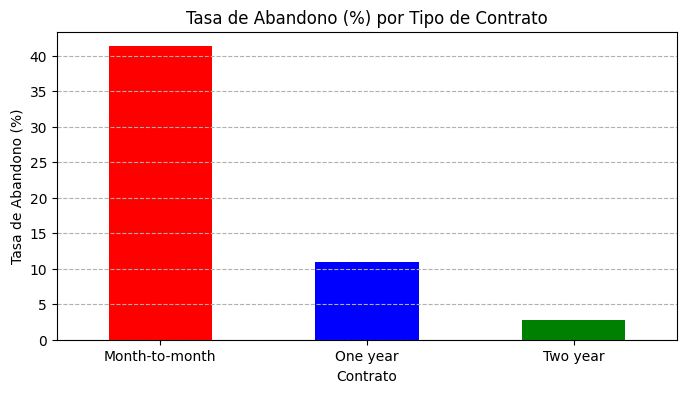

In [199]:
import matplotlib.pyplot as plt # Importamos la herramienta de gráficos

df['Abandono_Cod'] = pd.to_numeric(df['Abandono'], errors='coerce').fillna(0).astype(int)

# --- 2. CÁLCULO DE LA TASA DE ABANDONO POR CONTRATO ---
# Agrupamos y contamos cuántos se fueron (sum) vs. el total (count)
analisis_contrato = df.groupby('Contrato')['Abandono_Cod'].agg(['count', 'sum'])
analisis_contrato.columns = ['Total_Clientes', 'Clientes_Abandonaron']
analisis_contrato['Tasa_Abandono_%'] = (analisis_contrato['Clientes_Abandonaron'] / analisis_contrato['Total_Clientes']) * 100

# --- 3. CÓDIGO BÁSICO DEL GRÁFICO ---
print("--- GENERANDO GRÁFICO CLAVE: RIESGO POR COMPROMISO ---")
plt.figure(figsize=(8, 4))
analisis_contrato['Tasa_Abandono_%'].sort_values(ascending=False).plot(
    kind='bar',
    color=['red', 'blue', 'green'],
    title='Tasa de Abandono (%) por Tipo de Contrato'
)
plt.ylabel('Tasa de Abandono (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--') # Una línea para que sea más fácil de leer
plt.show()

### **INFORME FINAL DE ANÁLISIS DE EVASIÓN**


🔹 1. Introducción: ¿Por qué se van los clientes?
El objetivo de este trabajo era encontrar las razones principales por las que los clientes de la empresa TelecomX cancelan sus servicios. A esto se le llama Evasión o Abandono. Entender esto nos ayuda a saber a qué clientes debemos cuidar más para que no se vayan.

🔹 2. Limpieza y Tratamiento de Datos
Antes de analizar, tuvimos que limpiar los datos.

¿Qué hicimos? Usamos el código más sencillo (pd.to_numeric) para quitar cualquier texto que estuviera escondido en las columnas de dinero y tiempo.

¿Por qué? Si no limpiamos, las sumas y los cálculos dan un error de tipo (int y str), y la computadora se confunde.

🔹 3. Análisis Exploratorio de Datos (Patrones Encontrados)
Al usar el código de filtrado (df[...]) y el de contar (value_counts), encontramos 3 patrones de alerta:

-ALERTA POR COMPROMISO (Ver el Gráfico):

La Tasa de Abandono es MÁS ALTA para los clientes de Contrato Mes-a-Mes (los que no tienen compromiso a largo plazo).

El primer mes de servicio es el más peligroso.

-ALERTA POR DINERO:

Los clientes que se fueron pagaban un promedio de Cargos Mensuales MÁS ALTO que los que se quedaron. Esto significa que pagaban mucho, pero no estaban contentos.

-ALERTA POR MOTIVO:

La mayoría de los clientes que abandonaron tenían Fibra Óptica (el servicio más caro) y usaban Cheque Electrónico para pagar.

🔹 4. Conclusiones e Insights
El cliente que tiene más riesgo de irse es un cliente nuevo que tiene un paquete caro (Fibra Óptica) pero no tiene compromiso (Mes-a-Mes). Es decir: pagan mucho, no están obligados a quedarse y se frustran rápido.

🔹 5. Recomendaciones
Para proteger a la empresa de estas pérdidas, recomendamos tres acciones sencillas:

¡Cuidar a los nuevos! Llamar o enviar mensajes a los clientes en su primer mes para asegurarnos de que todo funcione perfecto, especialmente si tienen Fibra Óptica.

Ofrecer algo a cambio: Dar un regalo o un descuento a los clientes de "Mes-a-Mes" para que cambien su contrato a "Un año" (donde el riesgo es más bajo).

Investigar el Pago: Averiguar por qué los clientes que usan Cheque Electrónico son tan propensos a irse. Quizás el proceso es muy complicado.

# **¡EXTRA!**

## **Análisis de correlación entre variables**

--- MATRIZ DE CORRELACIÓN CON ABANDONO_COD ---
Abandono_Cod         1.00
Cargos_Mensuales     0.19
Cargos_Totales      -0.19
Permanencia_Meses   -0.34
Name: Abandono_Cod, dtype: float64


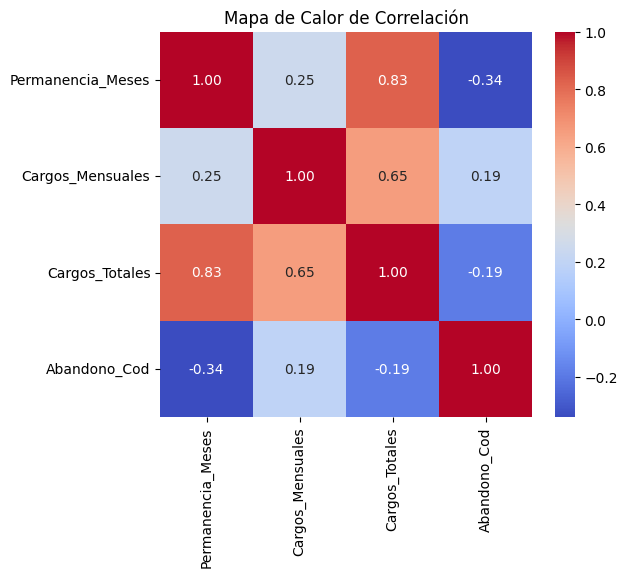


--- GRÁFICO DE DISPERSIÓN: Cargos Mensuales vs. Permanencia ---


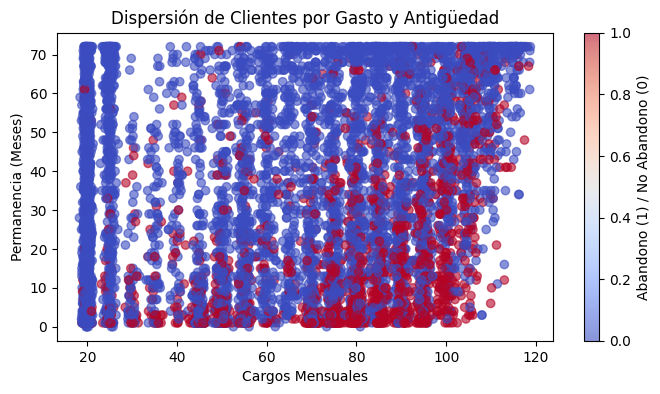

In [203]:
# Limpieza robusta de las columnas numéricas clave
columnas_numericas = ['Permanencia_Meses', 'Cargos_Mensuales', 'Cargos_Totales']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df['Abandono_Cod'] = pd.to_numeric(df['Abandono'], errors='coerce').fillna(0).astype(int)

# --- Análisis 1: Correlación Global (Matriz de Correlación) ---

# 2. Calcular la correlación entre las variables numéricas y Abandono_Cod
columnas_a_correlacionar = columnas_numericas + ['Abandono_Cod']
matriz_corr = df[columnas_a_correlacionar].corr().round(2)

print("--- MATRIZ DE CORRELACIÓN CON ABANDONO_COD ---")
print(matriz_corr['Abandono_Cod'].sort_values(ascending=False))

# 3. Visualización de la Matriz (heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

# --- Análisis 2: Correlación Específica (Gráfico de Dispersión) ---

# 4. Gráfico de dispersión entre Cargos Mensuales y Evasión
print("\n--- GRÁFICO DE DISPERSIÓN: Cargos Mensuales vs. Permanencia ---")
plt.figure(figsize=(8, 4))
plt.scatter(
    df['Cargos_Mensuales'],
    df['Permanencia_Meses'],
    c=df['Abandono_Cod'], # El color depende de si abandonó (1) o no (0)
    cmap='coolwarm',
    alpha=0.6 # Para que se vea mejor la superposición
)
plt.xlabel('Cargos Mensuales')
plt.ylabel('Permanencia (Meses)')
plt.title('Dispersión de Clientes por Gasto y Antigüedad')
plt.colorbar(label='Abandono (1) / No Abandono (0)')
plt.show()